# Lead Score Case Study
> By Isaac Martin, Jai Ganesh G & Jaydeep Gokhale

### Importing important modules

In [663]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

### Reading Data

In [664]:
data = pd.read_csv(r"C:\Users\jai.ganesh\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")

In [665]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [666]:
data.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


## Understanding data

In [667]:
data.shape

(9240, 37)

In [668]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [669]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [670]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**We have three types of variables in our data**<br>
1. Student Input Variables
2. Score Variables
3. Demographic Variables
**As we know we wont be having score variables during prediction in real time, so its better to drop them in the startung itself**

#### List of Score variables that are needed to be dropped
1. Tags
2. Lead Quality
3. Lead Profile
4. Asymmetrique Activity Index
5. Asymmetrique Profile Index
6. Asymmetrique Activity Score
7. Asymmetrique Profile Score 

In Addition to the above, the columns 'Last Activity and 'Last Notable Activity' contain almost similar data, so also dropping the coolumn 'Last Activity'

In [671]:
data.drop(columns=['Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index',
                   'Asymmetrique Activity Score','Asymmetrique Profile Score', 'Last Activity'],axis =1,inplace = True)

In [672]:
len(data.columns)
# Number of columns have been drop from 37 to 29 after dropping the irrelevant columns

29

In [673]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

**Analyze unique values in each categorical columns**

In [674]:
data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

### Checking for skew in data 

In [675]:
# Some of the categorical variables
cols = ['Lead Origin','Lead Source','Do Not Email','Do Not Call','Country','Specialization',
        'How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course',
        'Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
        'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
        'Update me on Supply Chain Content','Get updates on DM Content','City',
        'I agree to pay the amount through cheque','A free copy of Mastering The Interview','Last Notable Activity']

In [676]:
for col in cols:
    print(data[col].value_counts())
    print()

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

Do Not Email
No     8506
Yes     734
Name: count, dtype: int64

Do Not Call
No     9238
Yes       2
Name: count, dtype: int64

Country
India                   6492
United States             69
United Arab Emirates   

### List of skewed Variables 
1. X Education Forums
2. Through Recommendations
3. Search
4. Digital Advertisement
5. Newspaper Article
6. Newspaper
7. What matters most to you in choosing a course
8. Do Not Call

In [677]:
data.drop(columns=['X Education Forums','Through Recommendations','Digital Advertisement',
                   'Newspaper','Newspaper Article','Search','What matters most to you in choosing a course','Do Not Call'],
         axis =1,inplace = True)

**We can also drop those highly skewed variables which have only one unique values eg "Get updates on DM Content" has only "No" as these variables will not contribute in model training**

In [678]:
data.drop(columns = ['Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Magazine','I agree to pay the amount through cheque'],
         axis =1,inplace = True)

In [679]:
len(data.columns)

16

In [680]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Replacing  value 'select' in categorical variables with np.nan as select refers to the case when user did not entered any value

In [681]:
data['City'].value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [682]:
data['City'].replace("Select",np.nan,inplace = True)

In [683]:
data['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [684]:
data['How did you hear about X Education'].replace("Select",np.nan,inplace = True)

In [685]:
data['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [686]:
data['Specialization'].replace("Select",np.nan,inplace = True)

### Missing Values Analysis

In [687]:
data.count()

Prospect ID                               9240
Lead Number                               9240
Lead Origin                               9240
Lead Source                               9204
Do Not Email                              9240
Converted                                 9240
TotalVisits                               9103
Total Time Spent on Website               9240
Page Views Per Visit                      9103
Country                                   6779
Specialization                            5860
How did you hear about X Education        1990
What is your current occupation           6550
City                                      5571
A free copy of Mastering The Interview    9240
Last Notable Activity                     9240
dtype: int64

**We can see some of the values is missing in some of the columns, as the number of rows of the dataframe is 9240 but dataframe.count() shows some of the  column having lesser rows than 9240, which means the values are missing<br>
Lets see how much data is missing**

In [688]:
# Percentage of missing values in each columns
round(((data.isna().sum()/data.shape[0])*100),2).sort_values(ascending=False)

How did you hear about X Education        78.46
City                                      39.71
Specialization                            36.58
What is your current occupation           29.11
Country                                   26.63
TotalVisits                                1.48
Page Views Per Visit                       1.48
Lead Source                                0.39
Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Do Not Email                               0.00
Converted                                  0.00
Total Time Spent on Website                0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

**We should drop "How did you hear about X Education" as it has 78 percent missing values and "City" because even though it has ~40 percent missing values but it also contains Mumbai in high percentage , so it wont give importance to other categories, so its better to drop "City" Column.
For "Specialization" column we can leave it as it is and while creating dummy variable,we will remove the one with missing values**

In [689]:
data.drop(columns = ['How did you hear about X Education','City'],axis =1,inplace = True)

In [690]:
data.columns# Remaining columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

**Dropping the "Country" column now as it has now become a highly skewed variable**

In [691]:
data.drop(columns = ["Country"], axis=1, inplace =True )

In [692]:
# Percentage of missing values in each columns
round(((data.isna().sum()/data.shape[0])*100),2).sort_values(ascending=False)

Specialization                            36.58
What is your current occupation           29.11
TotalVisits                                1.48
Page Views Per Visit                       1.48
Lead Source                                0.39
Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Do Not Email                               0.00
Converted                                  0.00
Total Time Spent on Website                0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [693]:
data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

**For "What is your current occupation" column we can leave it as it is and while creating dummy variable,we will remove the one with missing values**

In [694]:
data['Specialization']=data['Specialization'].fillna("Missing")

In [695]:
data['What is your current occupation']=data['What is your current occupation'].fillna("Missing")

#### Checking for number of rows with high % of missing values

In [696]:
# Percentage Of missing values in each rows
round(((data.isnull().sum(axis=1)/data.shape[1])*100),2).sort_values(ascending=False)

5840    23.08
4605    23.08
836     23.08
2601    23.08
7847    23.08
        ...  
3124     0.00
3123     0.00
3122     0.00
3121     0.00
9239     0.00
Length: 9240, dtype: float64

In [697]:
len(data[(data.isna().sum(axis=1)/data.shape[1])>0])

166

#### We see that only 166 rows have missing values which is a very small % of the data and we can drop them 

In [698]:
data = data[~((data.isna().sum(axis=1)/data.shape[1])>0)]

In [699]:
data.isnull().sum(axis=0)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [700]:
data.shape

(9074, 13)

### We have managed to retain around 9000 rows after treating data for missing values

In [701]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [702]:
cols = data.columns

In [703]:
cols

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Checking and optimising the levels in Categorical Variables

##### Identifying Categorical Variables

In [704]:
data.nunique()

Prospect ID                               9074
Lead Number                               9074
Lead Origin                                  4
Lead Source                                 21
Do Not Email                                 2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1717
Page Views Per Visit                       114
Specialization                              19
What is your current occupation              7
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

In [705]:
data.count()

Prospect ID                               9074
Lead Number                               9074
Lead Origin                               9074
Lead Source                               9074
Do Not Email                              9074
Converted                                 9074
TotalVisits                               9074
Total Time Spent on Website               9074
Page Views Per Visit                      9074
Specialization                            9074
What is your current occupation           9074
A free copy of Mastering The Interview    9074
Last Notable Activity                     9074
dtype: int64

##### As we see, 'Prospect ID', Lead Number and Total Time SPent on Website are numeric variable and others are ceteogircal

In [706]:
cat_cols = ['Lead Origin', 'Lead Source','Do Not Email', 'Converted', 'TotalVisits', 'Page Views Per Visit','Specialization', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']

##### Checking the value counts of levels in each categorical variable

In [707]:
for i in cat_cols:
    print(i,"---",data[i].value_counts())

Lead Origin --- Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64
Lead Source --- Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
Do Not Email --- Do Not Email
No     8358
Yes     716
Name: count, dtype: int64
Converted --- Converted
0    5639
1    3435
Name: count, dtype: int64
TotalVisits --- TotalVisits
0.0      2161
2.0      1679
3.0      130

#### Combining levels with count below 10 for variable - 'Lead Source' 

In [708]:
series = pd.value_counts(data['Lead Source'])
mask = (series).lt(10)
data['Lead Source'] = np.where(data['Lead Source'].isin(series[mask].index),'Others',data['Lead Source'])

In [709]:
data['Lead Source'].value_counts()

Lead Source
Google              2868
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                28
Name: count, dtype: int64

#### Combining levels with count below 1200 for variable - 'TotalVisits' 

In [710]:
series = pd.value_counts(data['TotalVisits'])
mask = (series).lt(1200)
data['TotalVisits'] = np.where(data['TotalVisits'].isin(series[mask].index),'4 or more',data['TotalVisits'])

In [711]:
data['TotalVisits'].value_counts()

TotalVisits
4 or more    3928
0.0          2161
2.0          1679
3.0          1306
Name: count, dtype: int64

#### Combining count with values below 10 for variable - 'Page Views Per Visit' 

In [712]:
pd.options.display.max_rows = 150
data['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00     2161
2.00     1794
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.80        9
14.00       9
4.33        9
2.20        9
2.17        8
1.60        8
3.25        8
2.40        6
13.00       6
12.00       5
1.20        5
1.83        4
3.40        4
2.60        4
1.43        4
15.00       4
1.71        4
1.78        3
4.25        3
16.00       3
4.75        3
5.67        3
1.57        3
1.38        3
3.60        2
1.23        2
1.56        2
5.40        2
2.22        2
7.50        2
1.14        2
5.25        2
2.09        2
3.20        2
3.75        2
5.33        2
2.83        2
2.71        2
1.22        2
2.13        1

In [713]:
series = pd.value_counts(data['Page Views Per Visit'])
mask = (series).lt(100)
data['Page Views Per Visit'] = np.where(data['Page Views Per Visit'].isin(series[mask].index),'Negligible',data['Page Views Per Visit'])

In [714]:
data['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.0           2161
2.0           1794
3.0           1196
Negligible     935
4.0            896
1.0            651
5.0            517
1.5            306
6.0            244
2.5            241
7.0            133
Name: count, dtype: int64

#### Combining levels with count below 100 for variable - 'What is your current occupation' 

In [715]:
series = pd.value_counts(data['What is your current occupation'])
mask = (series).lt(100)
data['What is your current occupation'] = np.where(data['What is your current occupation'].isin(series[mask].index),'Other',data['What is your current occupation'])

In [716]:
data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5476
Missing                 2683
Working Professional     677
Student                  206
Other                     32
Name: count, dtype: int64

#### Combining levels with count below 50 for variable - 'Last Notable Activity' 

In [717]:
series = pd.value_counts(data['Last Notable Activity'])
mask = (series).lt(50)
data['Last Notable Activity'] = np.where(data['Last Notable Activity'].isin(series[mask].index),'Other',data['Last Notable Activity'])

In [718]:
data['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                   3267
Email Opened               2823
SMS Sent                   2152
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other                        98
Email Bounced                60
Name: count, dtype: int64

#### Combining levels with count below 200 for variable - 'Specialisation' 

In [719]:
series = pd.value_counts(data['Specialization'])
mask = (series).lt(200)
data['Specialization'] = np.where(data['Specialization'].isin(series[mask].index),'Other',data['Specialization'])

In [720]:
data['Specialization'].value_counts()

Specialization
Missing                              3282
Finance Management                    959
Human Resource Management             837
Other                                 824
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
Name: count, dtype: int64

### Verifying that the data is now in order for EDA and Model Development

In [721]:
data.describe()

,Lead Number,Converted,Total Time Spent on Website
count,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,482.887481
std,23348.029512,0.485053,545.256560
min,579533.000000,0.000000,0.000000
25%,596406.000000,0.000000,11.000000
50%,615278.500000,0.000000,246.000000
75%,637176.500000,1.000000,922.750000
max,660737.000000,1.000000,2272.000000


In [722]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Prospect ID                             9074 non-null   object
 1   Lead Number                             9074 non-null   int64 
 2   Lead Origin                             9074 non-null   object
 3   Lead Source                             9074 non-null   object
 4   Do Not Email                            9074 non-null   object
 5   Converted                               9074 non-null   int64 
 6   TotalVisits                             9074 non-null   object
 7   Total Time Spent on Website             9074 non-null   int64 
 8   Page Views Per Visit                    9074 non-null   object
 9   Specialization                          9074 non-null   object
 10  What is your current occupation         9074 non-null   object
 11  A free co

In [723]:
data.nunique()

Prospect ID                               9074
Lead Number                               9074
Lead Origin                                  4
Lead Source                                  9
Do Not Email                                 2
Converted                                    2
TotalVisits                                  4
Total Time Spent on Website               1717
Page Views Per Visit                        11
Specialization                              12
What is your current occupation              5
A free copy of Mastering The Interview       2
Last Notable Activity                        8
dtype: int64

### EDA

In [724]:
#Dropping ID variables for EDA 
data_df = data.drop(columns = ['Lead Number','Prospect ID'])

In [725]:
colu = ['Lead Origin','Lead Source','Do Not Email','TotalVisits','Page Views Per Visit','Specialization',
       'What is your current occupation','A free copy of Mastering The Interview','Last Notable Activity']

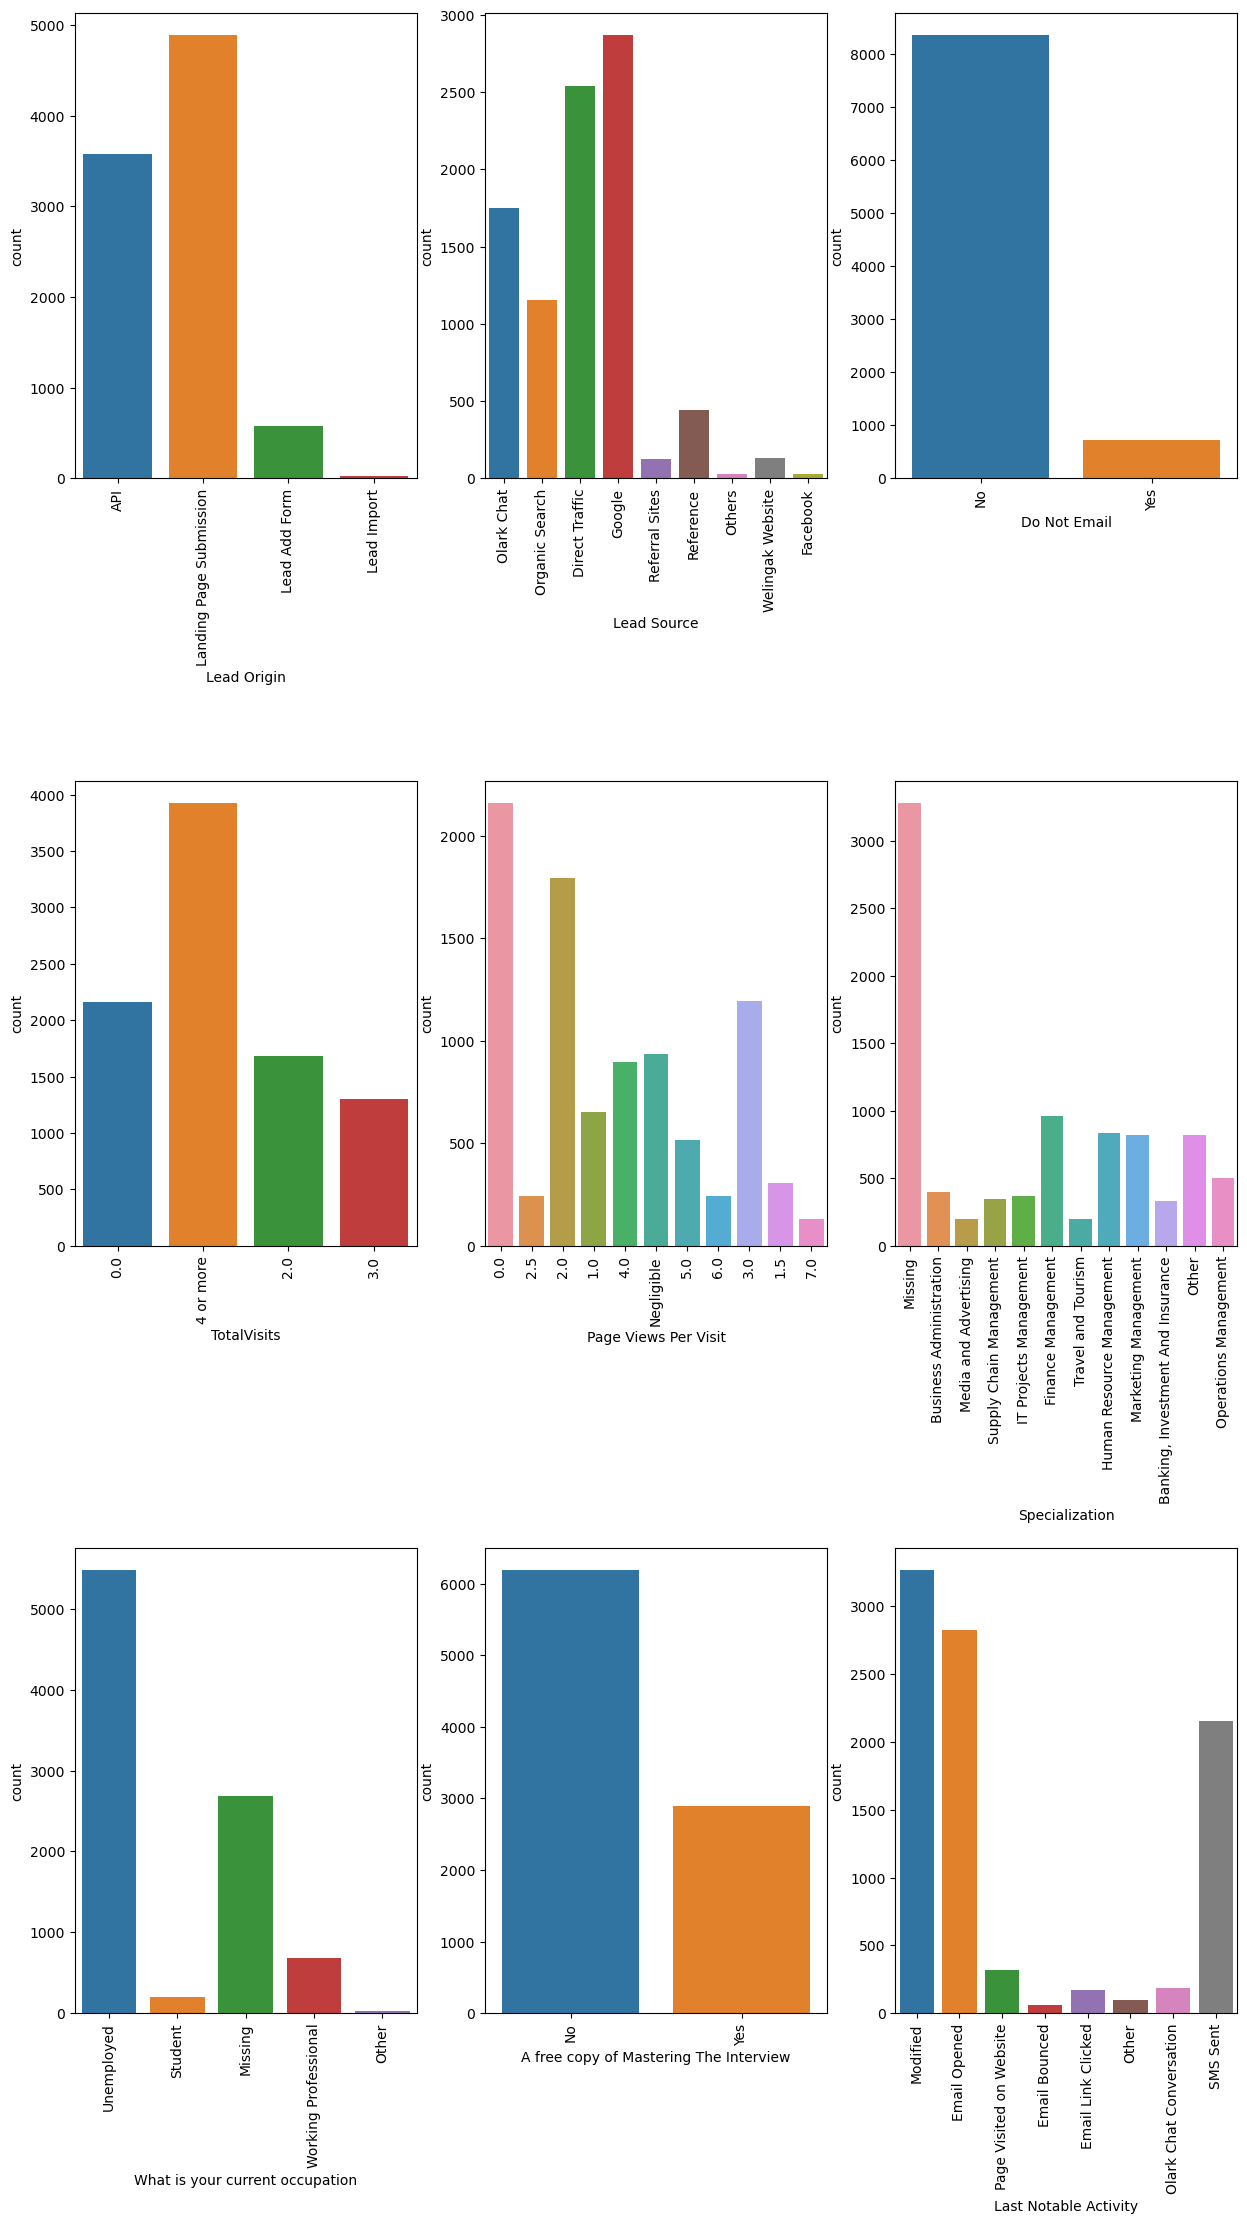

In [726]:
plt.figure(figsize = (15,25))
for i,j in enumerate(colu):
    plt.subplot(3,3,(i+1))
    plt.subplots_adjust(left=0.125,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.65)
    plott = sns.countplot(x=j, data=data)
    plt.setp(plott.get_xticklabels(), rotation=90)

[]

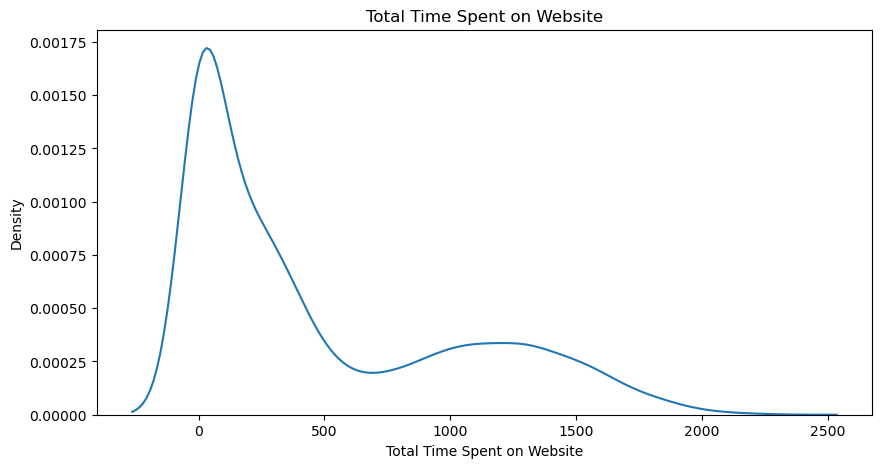

In [727]:
plt.figure(figsize=(10,5))
plt.title("Total Time Spent on Website")
sns.distplot(data_df['Total Time Spent on Website'].dropna(), hist = False)
plt.plot()

**Bivariate Analysis**

In [728]:
data_df.groupby(['Lead Source']).mean(numeric_only=True)

,Converted,Total Time Spent on Website
Lead Source,,
Direct Traffic,0.321667,605.907196
Facebook,0.290323,14.967742
Google,0.399930,655.638075
Olark Chat,0.255562,61.014261
Organic Search,0.377816,627.130849
Others,0.321429,471.500000
Reference,0.925508,90.805869
Referral Sites,0.248000,540.704000
Welingak Website,0.984496,64.968992


#### Checking categorical variables to understand the correlation with lead conversion

In [729]:
cat_cols.remove("Converted")

In [730]:
cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'TotalVisits',
 'Page Views Per Visit',
 'Specialization',
 'What is your current occupation',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

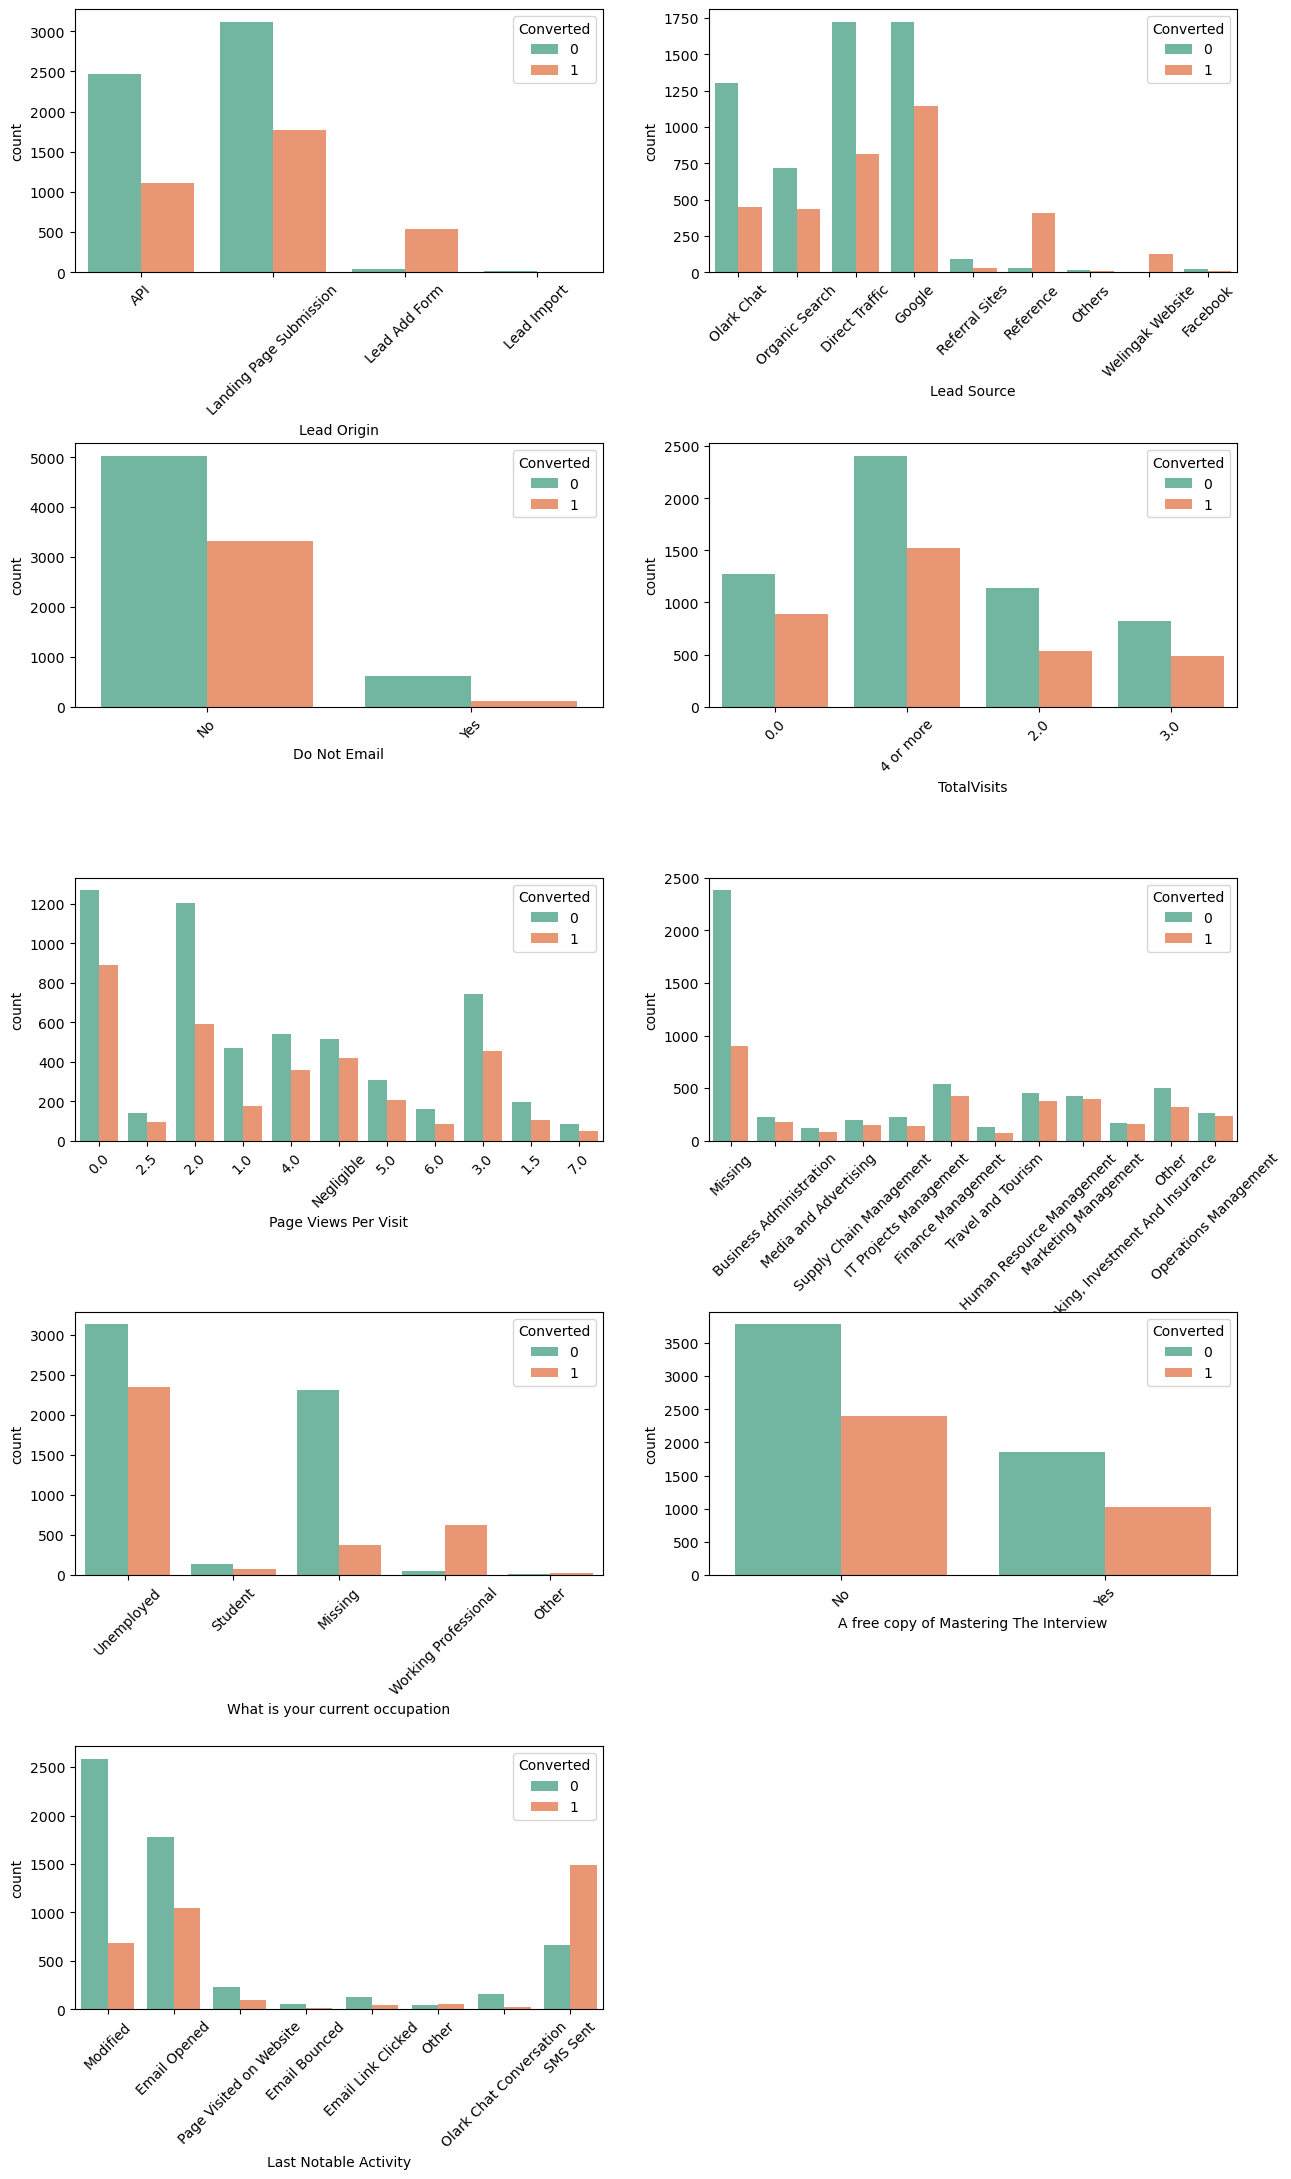

In [731]:
plt.figure(figsize = (15,25))
for i,j in enumerate(cat_cols):
    plt.subplot(5,2,(i+1))
    plt.subplots_adjust(left=0.125,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.65)
    plott = sns.countplot(x=data[j], hue = data["Converted"], palette = "Set2")
    plt.setp(plott.get_xticklabels(), rotation=45)


##### Above plots show that certain levels in most of the variables appear to have a clear negative or positive relationship with conversion status. 

#### Checking distribution of values for 'Time spent on website' to understand the correlation with lead conversion

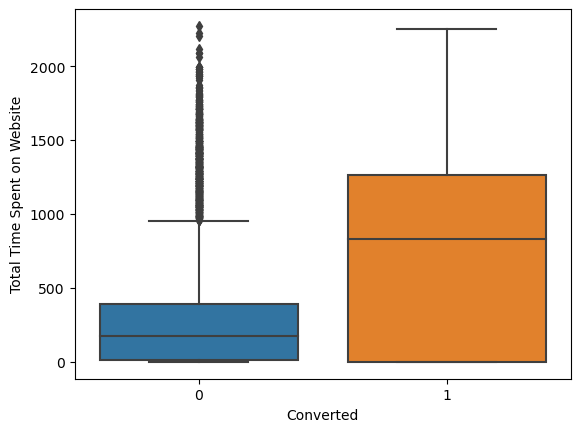

In [732]:
sns.boxplot(y =  data['Total Time Spent on Website'], x = data['Converted'])
plt.show()

##### Time Spent on website also looks to be a strong indicating factor of wether a lead will convert or not. 

### Creating Dummy variables

In [733]:
data.nunique()

Prospect ID                               9074
Lead Number                               9074
Lead Origin                                  4
Lead Source                                  9
Do Not Email                                 2
Converted                                    2
TotalVisits                                  4
Total Time Spent on Website               1717
Page Views Per Visit                        11
Specialization                              12
What is your current occupation              5
A free copy of Mastering The Interview       2
Last Notable Activity                        8
dtype: int64

In [734]:
data['Do Not Email'].value_counts()

Do Not Email
No     8358
Yes     716
Name: count, dtype: int64

In [735]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[['Lead Origin', 'Lead Source','Do Not Email','A free copy of Mastering The Interview',
                              'Specialization', 'What is your current occupation','Last Notable Activity','TotalVisits',
                              'Page Views Per Visit']], drop_first=True)



In [736]:
dummy1.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'A free copy of Mastering The Interview_Yes',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising', 'Specialization_Missing',
       'Specialization_Operations Management', 'Specialization_Other',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What 

In [737]:
dummy1.shape

(9074, 48)

In [738]:
# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)

In [739]:
data.shape

(9074, 61)

In [740]:
# We have created dummies for the below variables, so we can drop them
data.drop(columns = ['Lead Origin', 'Lead Source','Do Not Email','A free copy of Mastering The Interview',
                     'Specialization', 'What is your current occupation','Last Notable Activity','TotalVisits',
                     'Page Views Per Visit'],axis =1, inplace = True)

In [741]:
data.head()

,Prospect ID,Lead Number,Converted,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Page Views Per Visit_1.0,Page Views Per Visit_1.5,Page Views Per Visit_2.0,Page Views Per Visit_2.5,Page Views Per Visit_3.0,Page Views Per Visit_4.0,Page Views Per Visit_5.0,Page Views Per Visit_6.0,Page Views Per Visit_7.0,Page Views Per Visit_Negligible
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,674,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,1532,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,305,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,1428,True,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False


#### Outlier Treatment

In [742]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
data['Total Time Spent on Website'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
90%      1373.000000
95%      1557.000000
99%      1839.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

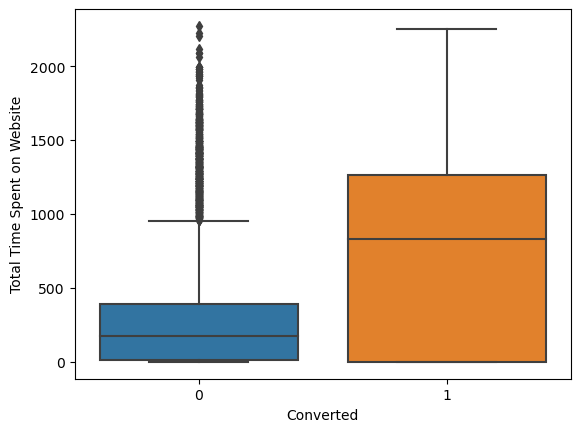

In [743]:
sns.boxplot(y='Total Time Spent on Website',x= "Converted",data=data)

**We dont think these outliers need to be treated because it might contribute to model building**

### Modeling

#### Train Test Split

In [744]:
X = data.drop(['Prospect ID','Lead Number','Converted'],axis =1)

In [745]:
X.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Page Views Per Visit_1.0,Page Views Per Visit_1.5,Page Views Per Visit_2.0,Page Views Per Visit_2.5,Page Views Per Visit_3.0,Page Views Per Visit_4.0,Page Views Per Visit_5.0,Page Views Per Visit_6.0,Page Views Per Visit_7.0,Page Views Per Visit_Negligible
0,0,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,674,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1532,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,305,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,1428,True,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [746]:
Y = data['Converted']

In [747]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [748]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [749]:
data_df.nunique()

Lead Origin                                  4
Lead Source                                  9
Do Not Email                                 2
Converted                                    2
TotalVisits                                  4
Total Time Spent on Website               1717
Page Views Per Visit                        11
Specialization                              12
What is your current occupation              5
A free copy of Mastering The Interview       2
Last Notable Activity                        8
dtype: int64

#### Scaling

In [750]:
scaler = StandardScaler()
X_train[['Total Time Spent on Website']] = scaler.fit_transform(X_train[['Total Time Spent on Website']])

X_train.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Page Views Per Visit_1.0,Page Views Per Visit_1.5,Page Views Per Visit_2.0,Page Views Per Visit_2.5,Page Views Per Visit_3.0,Page Views Per Visit_4.0,Page Views Per Visit_5.0,Page Views Per Visit_6.0,Page Views Per Visit_7.0,Page Views Per Visit_Negligible
3009,-0.160255,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1012,-0.540048,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
9226,-0.888650,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4750,1.643304,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
7987,2.017593,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


#### Checking for data imbalance. 

In [751]:
### Checking the Conversion Rate
conv = (sum(data['Converted'])/len(data['Converted'].index))*100
conv

37.85541106458012

We have almost 37% conversion rate

#### Converting Boolean cols to numbers to map the correlation

In [752]:
bool_columns = data.select_dtypes(include=[bool]).columns
data[bool_columns] = data[bool_columns].astype(int)

### Looking for correlations

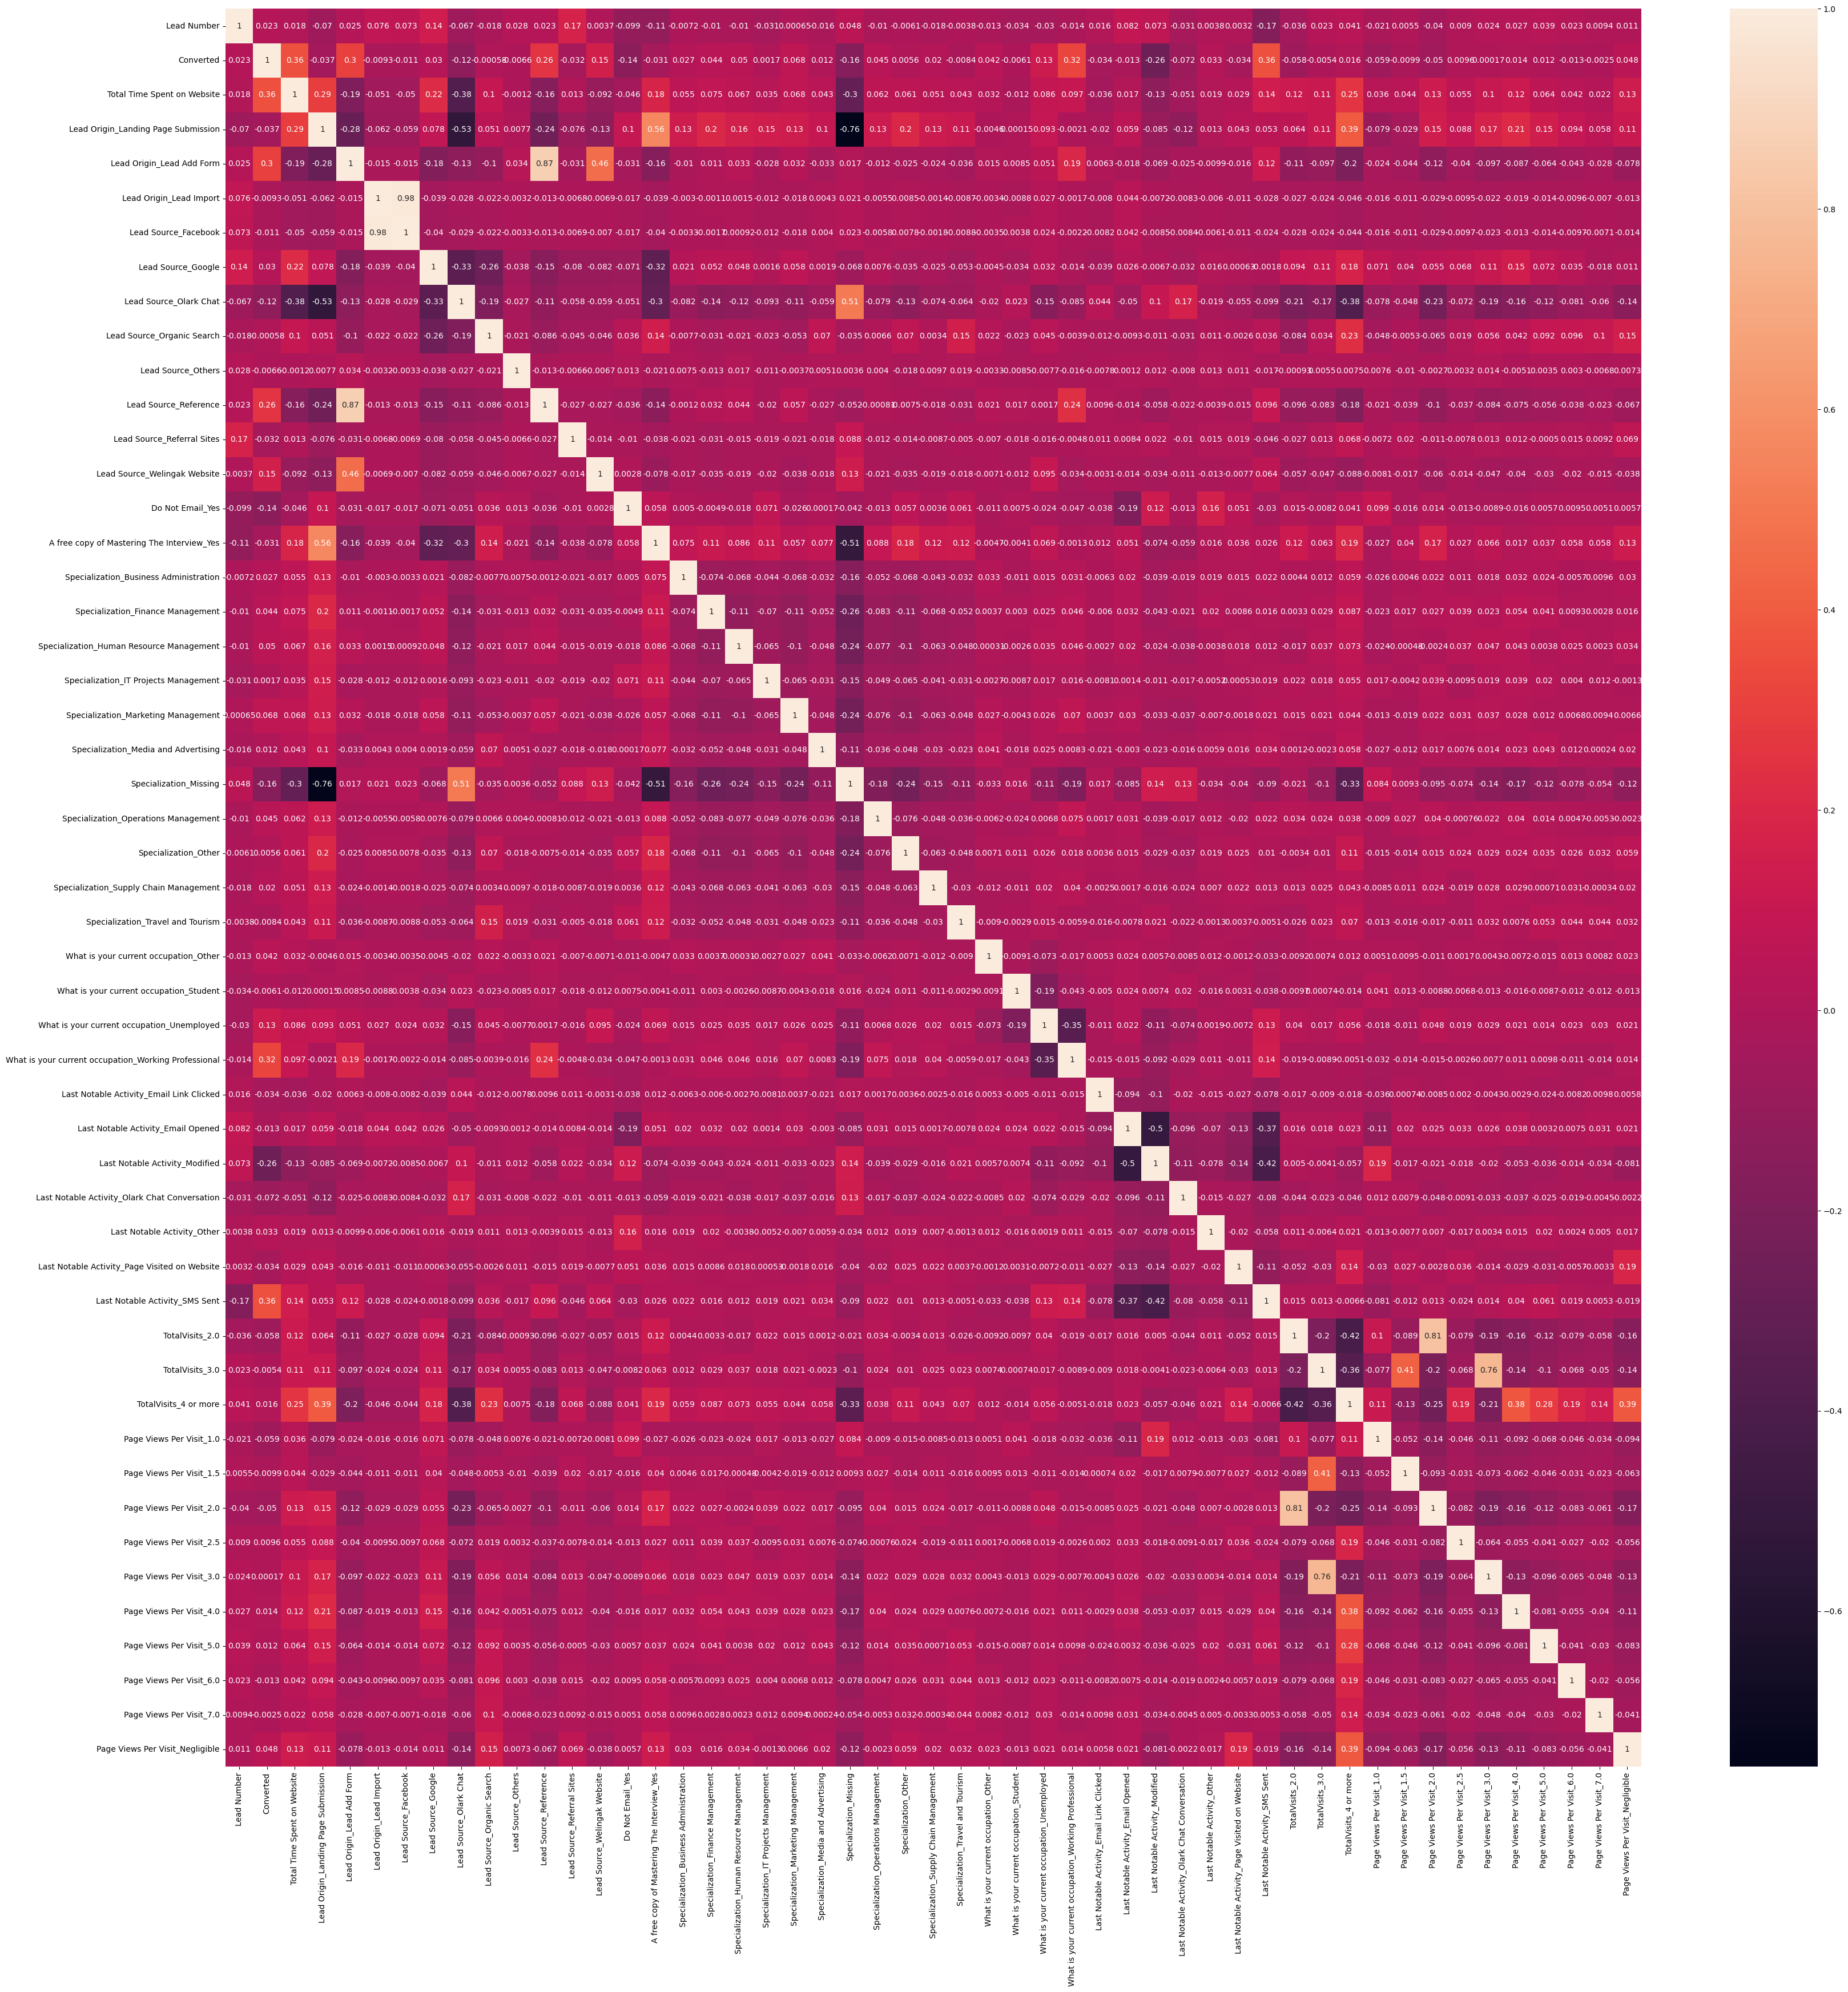

In [753]:
# Let's see the correlation matrix
corr_matrix = data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize = (40,40))        # Size of the figure
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [754]:
####  Identifying the Top correlated variable
data_without_id = data.drop(columns=['Prospect ID'])
data_corr = data_without_id.corr().abs().unstack()
data_corr = data_corr.sort_values(ascending=False)
data_corr[51:85]

Lead Source_Facebook                        Lead Origin_Lead Import                       0.983684
Lead Origin_Lead Import                     Lead Source_Facebook                          0.983684
Lead Origin_Lead Add Form                   Lead Source_Reference                         0.866191
Lead Source_Reference                       Lead Origin_Lead Add Form                     0.866191
Page Views Per Visit_2.0                    TotalVisits_2.0                               0.808089
TotalVisits_2.0                             Page Views Per Visit_2.0                      0.808089
Page Views Per Visit_3.0                    TotalVisits_3.0                               0.763706
TotalVisits_3.0                             Page Views Per Visit_3.0                      0.763706
Lead Origin_Landing Page Submission         Specialization_Missing                        0.755381
Specialization_Missing                      Lead Origin_Landing Page Submission           0.755381
A free cop

#### Eliminating the top 5 correlated variables - Lead Source_Facebook, Lead Origin_Lead Import, Lead Origin_Lead Import, Lead Source_Reference, Page Views Per Visit_2.0 

In [755]:
X_train.drop(['Lead Source_Facebook', 'Lead Source_Reference', 'Page Views Per Visit_2.0', 'Page Views Per Visit_3.0','Specialization_Missing' ], axis =1, inplace = True)

In [756]:
X_test.drop(['Lead Source_Facebook', 'Lead Source_Reference', 'Page Views Per Visit_2.0', 'Page Views Per Visit_3.0','Specialization_Missing' ], axis =1, inplace = True)

In [757]:
# Remaining columns
X_train.columns

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'A free copy of Mastering The Interview_Yes',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Other',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
    

### Feature Selection Using RFE

In [758]:
logreg = LogisticRegression()
rfe = RFE(logreg,  n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [759]:
rfe.support_

array([ True,  True,  True, False, False, False, False, False, False,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False, False, False, False, False, False,  True, False])

In [760]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 18),
 ('Lead Source_Google', False, 6),
 ('Lead Source_Olark Chat', False, 15),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Others', False, 16),
 ('Lead Source_Referral Sites', False, 9),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('A free copy of Mastering The Interview_Yes', False, 17),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_IT Projects Management', True, 1),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Media and Advertising', False, 7),
 ('Specialization_Operations Management', True, 1),
 ('Specialization_Other', True, 1),
 ('Specialization_Supply Chain Management', True, 1),
 ('Specialization_Travel and Tou

In [761]:
col = X_train.columns[rfe.support_]

In [762]:
X_train.columns[~rfe.support_]

Index(['Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Referral Sites',
       'A free copy of Mastering The Interview_Yes',
       'Specialization_Media and Advertising',
       'Specialization_Travel and Tourism',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Page Visited on Website',
       'Page Views Per Visit_1.0', 'Page Views Per Visit_1.5',
       'Page Views Per Visit_2.5', 'Page Views Per Visit_4.0',
       'Page Views Per Visit_5.0', 'Page Views Per Visit_6.0',
       'Page Views Per Visit_Negligible'],
      dtype='object')

#### Assessing the model with StatsModels

In [763]:
import statsmodels.api as sm
X_train[col] = X_train[col].astype(int)
X_train_sm = sm.add_constant(X_train[col])
X_train_sm = X_train_sm.apply(pd.to_numeric, errors='coerce')
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2752.2
Date:                Tue, 20 Aug 2024   Deviance:                       5504.4
Time:                        18:55:37   Pearson chi2:                 6.51e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3727
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8345      0.109    -16.890      0.000      -2.047      -1.622
Total Time Spent on Website                              1.3928      0.067     20.691      0.000       1.261       1.525
Lead Origin_Landing Page Submission                     -0.6936      0.102     -6.780      0.000      -0.894      -0.493
Lead Origin_Lead Add Form                                2.2138      0.230      9.630      0.000       1.763       2.664
Lead Source_Welingak Website                             2.4152      0.760      3.178      0.001       0.925       3.905
Do Not Email_Yes                                        -1.7181      0.182     -9.447      0.000      -2.075      -1.362
Specialization_Business Administration                   0.4783      0.186      2.569      0.010       0.113       0.843
Specialization_Finance Management                        0.6086      0.132      4.600      0.000       0.349       0.868
Specialization_Human Resource Management                 0.6115      0.134      4.564      0.000       0.349       0.874
Specialization_IT Projects Management                    0.5802      0.192      3.026      0.002       0.204       0.956
Specialization_Marketing Management                      0.7491      0.134      5.579      0.000       0.486       1.012
Specialization_Operations Management                     0.6135      0.165      3.709      0.000       0.289       0.938
Specialization_Other                                     0.4716      0.136      3.455      0.001       0.204       0.739
Specialization_Supply Chain Management                   0.5298      0.193      2.747      0.006       0.152       0.908
What is your current occupation_Other                    2.4734      0.543      4.551      0.000       1.408       3.538
What is your current occupation_Student                  1.2589      0.220      5.717      0.000       0.827       1.691
What is your current occupation_Unemployed               1.1156      0.086     12.980      0.000       0.947       1.284
What is your current occupation_Working Professional     3.5662      0.197     18.118      0.000       3.180       3.952
Last Notable Activity_Modified                          -0.6369      0.083     -7.714      0.000      -0.799      -0.475
Last Notable Activity_Olark Chat Conversation           -0.9655      0.308     -3.133      0.002      -1.569      -0.362
Last Notable Activity_Other                              1.8033      0.307      5.877      0.000       1.202       2.405
Last Notable Activity_SMS Sent                           1.3894      0.084     16.511      0.000       1.224       1.554
TotalVisits_2.0                                         -0

In [764]:
# Dropping variable 'TotalVisits_4 or more' with high p value

col = col.drop('TotalVisits_4 or more', 1)

In [765]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2752.9
Date:                Tue, 20 Aug 2024   Deviance:                       5505.7
Time:                        18:55:37   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3726
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8945      0.096    -19.800      0.000      -2.082      -1.707
Total Time Spent on Website                              1.3778      0.066     20.900      0.000       1.249       1.507
Lead Origin_Landing Page Submission                     -0.7360      0.095     -7.729      0.000      -0.923      -0.549
Lead Origin_Lead Add Form                                2.2766      0.223     10.192      0.000       1.839       2.714
Lead Source_Welingak Website                             2.4093      0.760      3.170      0.002       0.919       3.899
Do Not Email_Yes                                        -1.7157      0.182     -9.443      0.000      -2.072      -1.360
Specialization_Business Administration                   0.4660      0.186      2.510      0.012       0.102       0.830
Specialization_Finance Management                        0.5955      0.132      4.524      0.000       0.338       0.853
Specialization_Human Resource Management                 0.5982      0.133      4.489      0.000       0.337       0.859
Specialization_IT Projects Management                    0.5684      0.191      2.973      0.003       0.194       0.943
Specialization_Marketing Management                      0.7368      0.134      5.511      0.000       0.475       0.999
Specialization_Operations Management                     0.6016      0.165      3.650      0.000       0.279       0.925
Specialization_Other                                     0.4598      0.136      3.383      0.001       0.193       0.726
Specialization_Supply Chain Management                   0.5190      0.192      2.698      0.007       0.142       0.896
What is your current occupation_Other                    2.4543      0.543      4.519      0.000       1.390       3.519
What is your current occupation_Student                  1.2639      0.220      5.737      0.000       0.832       1.696
What is your current occupation_Unemployed               1.1092      0.086     12.935      0.000       0.941       1.277
What is your current occupation_Working Professional     3.5595      0.197     18.090      0.000       3.174       3.945
Last Notable Activity_Modified                          -0.6332      0.082     -7.676      0.000      -0.795      -0.472
Last Notable Activity_Olark Chat Conversation           -0.9562      0.309     -3.094      0.002      -1.562      -0.350
Last Notable Activity_Other                              1.7986      0.307      5.860      0.000       1.197       2.400
Last Notable Activity_SMS Sent                           1.3916      0.084     16.549      0.000       1.227       1.556
TotalVisits_2.0                                         -0

In [766]:
# Dropping variable 'TotalVisits_3.0 or more' with high p value

col = col.drop('TotalVisits_3.0', 1)

In [767]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2754.0
Date:                Tue, 20 Aug 2024   Deviance:                       5508.0
Time:                        18:55:37   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3724
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9149      0.095    -20.189      0.000      -2.101      -1.729
Total Time Spent on Website                              1.3724      0.066     20.866      0.000       1.243       1.501
Lead Origin_Landing Page Submission                     -0.7399      0.095     -7.777      0.000      -0.926      -0.553
Lead Origin_Lead Add Form                                2.3000      0.223     10.322      0.000       1.863       2.737
Lead Source_Welingak Website                             2.4072      0.760      3.167      0.002       0.917       3.897
Do Not Email_Yes                                        -1.7139      0.182     -9.439      0.000      -2.070      -1.358
Specialization_Business Administration                   0.4642      0.186      2.501      0.012       0.100       0.828
Specialization_Finance Management                        0.5936      0.131      4.515      0.000       0.336       0.851
Specialization_Human Resource Management                 0.5925      0.133      4.449      0.000       0.332       0.854
Specialization_IT Projects Management                    0.5614      0.191      2.935      0.003       0.186       0.936
Specialization_Marketing Management                      0.7285      0.133      5.460      0.000       0.467       0.990
Specialization_Operations Management                     0.5956      0.165      3.614      0.000       0.273       0.919
Specialization_Other                                     0.4582      0.136      3.371      0.001       0.192       0.725
Specialization_Supply Chain Management                   0.5131      0.192      2.670      0.008       0.137       0.890
What is your current occupation_Other                    2.4472      0.542      4.513      0.000       1.384       3.510
What is your current occupation_Student                  1.2607      0.220      5.731      0.000       0.830       1.692
What is your current occupation_Unemployed               1.1067      0.086     12.911      0.000       0.939       1.275
What is your current occupation_Working Professional     3.5551      0.197     18.089      0.000       3.170       3.940
Last Notable Activity_Modified                          -0.6334      0.082     -7.680      0.000      -0.795      -0.472
Last Notable Activity_Olark Chat Conversation           -0.9454      0.309     -3.063      0.002      -1.550      -0.340
Last Notable Activity_Other                              1.7935      0.307      5.841      0.000       1.192       2.395
Last Notable Activity_SMS Sent                           1.3895      0.084     16.531      0.000       1.225       1.554
TotalVisits_2.0                                         -0

**All the variables have p value less than 0.05, checking the VIF**

In [768]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [769]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,4.12
15,What is your current occupation_Unemployed,2.51
2,Lead Origin_Lead Add Form,1.72
6,Specialization_Finance Management,1.63
20,Last Notable Activity_SMS Sent,1.60
11,Specialization_Other,1.55
7,Specialization_Human Resource Management,1.53
9,Specialization_Marketing Management,1.49
17,Last Notable Activity_Modified,1.48
16,What is your current occupation_Working Profes...,1.40


#### Dropping 'Lead Origin_landing Page Submission' with high VIF

In [770]:
col = col.drop(['Lead Origin_Landing Page Submission'], 1)

In [771]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2785.2
Date:                Tue, 20 Aug 2024   Deviance:                       5570.5
Time:                        18:55:38   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3662
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0517      0.094    -21.866      0.000      -2.236      -1.868
Total Time Spent on Website                              1.3295      0.065     20.527      0.000       1.203       1.456
Lead Origin_Lead Add Form                                2.7060      0.216     12.519      0.000       2.282       3.130
Lead Source_Welingak Website                             2.1885      0.759      2.884      0.004       0.701       3.676
Do Not Email_Yes                                        -1.7611      0.179     -9.854      0.000      -2.111      -1.411
Specialization_Business Administration                  -0.0161      0.173     -0.093      0.926      -0.354       0.322
Specialization_Finance Management                        0.0961      0.114      0.847      0.397      -0.126       0.319
Specialization_Human Resource Management                 0.1247      0.117      1.066      0.286      -0.104       0.354
Specialization_IT Projects Management                    0.0618      0.178      0.347      0.729      -0.287       0.411
Specialization_Marketing Management                      0.3019      0.120      2.522      0.012       0.067       0.537
Specialization_Operations Management                     0.1279      0.151      0.845      0.398      -0.169       0.424
Specialization_Other                                    -0.0111      0.120     -0.092      0.927      -0.247       0.224
Specialization_Supply Chain Management                   0.0275      0.179      0.153      0.878      -0.324       0.379
What is your current occupation_Other                    2.5190      0.526      4.785      0.000       1.487       3.551
What is your current occupation_Student                  1.2049      0.219      5.492      0.000       0.775       1.635
What is your current occupation_Unemployed               1.1011      0.085     12.912      0.000       0.934       1.268
What is your current occupation_Working Professional     3.5651      0.194     18.340      0.000       3.184       3.946
Last Notable Activity_Modified                          -0.6109      0.082     -7.460      0.000      -0.771      -0.450
Last Notable Activity_Olark Chat Conversation           -0.7986      0.307     -2.600      0.009      -1.401      -0.197
Last Notable Activity_Other                              1.8097      0.305      5.937      0.000       1.212       2.407
Last Notable Activity_SMS Sent                           1.3466      0.083     16.189      0.000       1.184       1.510
TotalVisits_2.0                                         -0.3784      0.086     -4.412      0.000      -0.547      -0.210
Page Views Per Visit_7.0                                -0

#### Dropping Specialization_Other with high p-value

In [772]:
col = col.drop('Specialization_Other', 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2785.2
Date:                Tue, 20 Aug 2024   Deviance:                       5570.5
Time:                        18:55:39   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3662
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0535      0.092    -22.381      0.000      -2.233      -1.874
Total Time Spent on Website                              1.3291      0.065     20.576      0.000       1.202       1.456
Lead Origin_Lead Add Form                                2.7058      0.216     12.519      0.000       2.282       3.129
Lead Source_Welingak Website                             2.1907      0.758      2.888      0.004       0.704       3.677
Do Not Email_Yes                                        -1.7621      0.178     -9.877      0.000      -2.112      -1.412
Specialization_Business Administration                  -0.0138      0.171     -0.081      0.935      -0.348       0.321
Specialization_Finance Management                        0.0984      0.111      0.887      0.375      -0.119       0.316
Specialization_Human Resource Management                 0.1269      0.114      1.110      0.267      -0.097       0.351
Specialization_IT Projects Management                    0.0641      0.177      0.363      0.717      -0.282       0.410
Specialization_Marketing Management                      0.3041      0.117      2.595      0.009       0.074       0.534
Specialization_Operations Management                     0.1301      0.149      0.871      0.383      -0.163       0.423
Specialization_Supply Chain Management                   0.0298      0.178      0.168      0.867      -0.319       0.378
What is your current occupation_Other                    2.5180      0.526      4.785      0.000       1.487       3.549
What is your current occupation_Student                  1.2043      0.219      5.492      0.000       0.774       1.634
What is your current occupation_Unemployed               1.1006      0.085     12.929      0.000       0.934       1.267
What is your current occupation_Working Professional     3.5639      0.194     18.377      0.000       3.184       3.944
Last Notable Activity_Modified                          -0.6105      0.082     -7.467      0.000      -0.771      -0.450
Last Notable Activity_Olark Chat Conversation           -0.7971      0.307     -2.599      0.009      -1.398      -0.196
Last Notable Activity_Other                              1.8095      0.305      5.937      0.000       1.212       2.407
Last Notable Activity_SMS Sent                           1.3467      0.083     16.191      0.000       1.184       1.510
TotalVisits_2.0                                         -0.3781      0.086     -4.412      0.000      -0.546      -0.210
Page Views Per Visit_7.0                                -0.7364      0.277     -2.659      0.008      -1.279      -0.194
==========================================================

#### Dropping Specialization_Supply Chain Management with high p-value

In [773]:
col = col.drop('Specialization_Supply Chain Management', 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2785.2
Date:                Tue, 20 Aug 2024   Deviance:                       5570.5
Time:                        18:55:39   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3661
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0520      0.091    -22.476      0.000      -2.231      -1.873
Total Time Spent on Website                              1.3296      0.065     20.602      0.000       1.203       1.456
Lead Origin_Lead Add Form                                2.7052      0.216     12.519      0.000       2.282       3.129
Lead Source_Welingak Website                             2.1894      0.758      2.887      0.004       0.703       3.676
Do Not Email_Yes                                        -1.7624      0.178     -9.878      0.000      -2.112      -1.413
Specialization_Business Administration                  -0.0160      0.170     -0.094      0.925      -0.350       0.318
Specialization_Finance Management                        0.0962      0.110      0.873      0.382      -0.120       0.312
Specialization_Human Resource Management                 0.1247      0.114      1.098      0.272      -0.098       0.347
Specialization_IT Projects Management                    0.0619      0.176      0.352      0.725      -0.283       0.407
Specialization_Marketing Management                      0.3019      0.116      2.593      0.010       0.074       0.530
Specialization_Operations Management                     0.1279      0.149      0.860      0.390      -0.164       0.419
What is your current occupation_Other                    2.5177      0.526      4.784      0.000       1.486       3.549
What is your current occupation_Student                  1.2044      0.219      5.492      0.000       0.775       1.634
What is your current occupation_Unemployed               1.1014      0.085     12.960      0.000       0.935       1.268
What is your current occupation_Working Professional     3.5659      0.194     18.422      0.000       3.187       3.945
Last Notable Activity_Modified                          -0.6106      0.082     -7.470      0.000      -0.771      -0.450
Last Notable Activity_Olark Chat Conversation           -0.7987      0.307     -2.606      0.009      -1.400      -0.198
Last Notable Activity_Other                              1.8092      0.305      5.937      0.000       1.212       2.406
Last Notable Activity_SMS Sent                           1.3465      0.083     16.191      0.000       1.183       1.509
TotalVisits_2.0                                         -0.3782      0.086     -4.412      0.000      -0.546      -0.210
Page Views Per Visit_7.0                                -0.7368      0.277     -2.660      0.008      -1.280      -0.194
========================================================================================================================
"""

#### Dropping Specialization_Business Administration with high p-value

In [774]:
col = col.drop('Specialization_Business Administration', 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2785.2
Date:                Tue, 20 Aug 2024   Deviance:                       5570.5
Time:                        18:55:39   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3661
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0530      0.091    -22.648      0.000      -2.231      -1.875
Total Time Spent on Website                              1.3293      0.064     20.616      0.000       1.203       1.456
Lead Origin_Lead Add Form                                2.7054      0.216     12.520      0.000       2.282       3.129
Lead Source_Welingak Website                             2.1899      0.758      2.888      0.004       0.703       3.676
Do Not Email_Yes                                        -1.7623      0.178     -9.877      0.000      -2.112      -1.413
Specialization_Finance Management                        0.0974      0.109      0.890      0.373      -0.117       0.312
Specialization_Human Resource Management                 0.1259      0.113      1.116      0.264      -0.095       0.347
Specialization_IT Projects Management                    0.0631      0.176      0.359      0.719      -0.281       0.407
Specialization_Marketing Management                      0.3031      0.116      2.619      0.009       0.076       0.530
Specialization_Operations Management                     0.1291      0.148      0.871      0.384      -0.161       0.420
What is your current occupation_Other                    2.5162      0.526      4.784      0.000       1.485       3.547
What is your current occupation_Student                  1.2044      0.219      5.493      0.000       0.775       1.634
What is your current occupation_Unemployed               1.1012      0.085     12.963      0.000       0.935       1.268
What is your current occupation_Working Professional     3.5653      0.193     18.429      0.000       3.186       3.944
Last Notable Activity_Modified                          -0.6103      0.082     -7.473      0.000      -0.770      -0.450
Last Notable Activity_Olark Chat Conversation           -0.7984      0.307     -2.604      0.009      -1.399      -0.198
Last Notable Activity_Other                              1.8092      0.305      5.937      0.000       1.212       2.406
Last Notable Activity_SMS Sent                           1.3465      0.083     16.191      0.000       1.183       1.509
TotalVisits_2.0                                         -0.3782      0.086     -4.412      0.000      -0.546      -0.210
Page Views Per Visit_7.0                                -0.7366      0.277     -2.660      0.008      -1.279      -0.194
========================================================================================================================
"""

#### Dropping Specialization_IT Projects Management with high p-value

In [775]:
col = col.drop('Specialization_IT Projects Management', 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2785.3
Date:                Tue, 20 Aug 2024   Deviance:                       5570.6
Time:                        18:55:39   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3661
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0499      0.090    -22.723      0.000      -2.227      -1.873
Total Time Spent on Website                              1.3296      0.064     20.624      0.000       1.203       1.456
Lead Origin_Lead Add Form                                2.7045      0.216     12.518      0.000       2.281       3.128
Lead Source_Welingak Website                             2.1875      0.758      2.885      0.004       0.701       3.674
Do Not Email_Yes                                        -1.7606      0.178     -9.867      0.000      -2.110      -1.411
Specialization_Finance Management                        0.0934      0.109      0.858      0.391      -0.120       0.307
Specialization_Human Resource Management                 0.1219      0.112      1.086      0.278      -0.098       0.342
Specialization_Marketing Management                      0.2991      0.115      2.596      0.009       0.073       0.525
Specialization_Operations Management                     0.1250      0.148      0.846      0.398      -0.165       0.415
What is your current occupation_Other                    2.5149      0.526      4.782      0.000       1.484       3.546
What is your current occupation_Student                  1.2052      0.219      5.496      0.000       0.775       1.635
What is your current occupation_Unemployed               1.1022      0.085     12.981      0.000       0.936       1.269
What is your current occupation_Working Professional     3.5669      0.193     18.446      0.000       3.188       3.946
Last Notable Activity_Modified                          -0.6113      0.082     -7.490      0.000      -0.771      -0.451
Last Notable Activity_Olark Chat Conversation           -0.7997      0.306     -2.609      0.009      -1.400      -0.199
Last Notable Activity_Other                              1.8068      0.305      5.933      0.000       1.210       2.404
Last Notable Activity_SMS Sent                           1.3466      0.083     16.192      0.000       1.184       1.510
TotalVisits_2.0                                         -0.3773      0.086     -4.404      0.000      -0.545      -0.209
Page Views Per Visit_7.0                                -0.7350      0.277     -2.654      0.008      -1.278      -0.192
========================================================================================================================
"""

In [776]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.20
15,Last Notable Activity_SMS Sent,1.57
1,Lead Origin_Lead Add Form,1.54
12,Last Notable Activity_Modified,1.45
2,Lead Source_Welingak Website,1.35
11,What is your current occupation_Working Profes...,1.33
0,Total Time Spent on Website,1.30
16,TotalVisits_2.0,1.23
4,Specialization_Finance Management,1.15
5,Specialization_Human Resource Management,1.14


#### Dropping Specialization_Operations Management with high p-value

In [777]:
col = col.drop('Specialization_Operations Management', 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2785.7
Date:                Tue, 20 Aug 2024   Deviance:                       5571.3
Time:                        18:55:40   Pearson chi2:                 6.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3661
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0416      0.090    -22.778      0.000      -2.217      -1.866
Total Time Spent on Website                              1.3319      0.064     20.680      0.000       1.206       1.458
Lead Origin_Lead Add Form                                2.7040      0.216     12.516      0.000       2.281       3.127
Lead Source_Welingak Website                             2.1813      0.758      2.877      0.004       0.695       3.667
Do Not Email_Yes                                        -1.7627      0.178     -9.880      0.000      -2.112      -1.413
Specialization_Finance Management                        0.0828      0.108      0.766      0.444      -0.129       0.295
Specialization_Human Resource Management                 0.1112      0.112      0.997      0.319      -0.107       0.330
Specialization_Marketing Management                      0.2884      0.115      2.518      0.012       0.064       0.513
What is your current occupation_Other                    2.5116      0.526      4.776      0.000       1.481       3.542
What is your current occupation_Student                  1.2030      0.219      5.488      0.000       0.773       1.633
What is your current occupation_Unemployed               1.1048      0.085     13.021      0.000       0.938       1.271
What is your current occupation_Working Professional     3.5755      0.193     18.517      0.000       3.197       3.954
Last Notable Activity_Modified                          -0.6137      0.082     -7.525      0.000      -0.774      -0.454
Last Notable Activity_Olark Chat Conversation           -0.8059      0.306     -2.632      0.008      -1.406      -0.206
Last Notable Activity_Other                              1.8052      0.304      5.928      0.000       1.208       2.402
Last Notable Activity_SMS Sent                           1.3456      0.083     16.183      0.000       1.183       1.509
TotalVisits_2.0                                         -0.3751      0.086     -4.379      0.000      -0.543      -0.207
Page Views Per Visit_7.0                                -0.7357      0.277     -2.655      0.008      -1.279      -0.193
========================================================================================================================
"""

#### Dropping Specialization_Finance Management with high p-value

In [778]:
col = col.drop('Specialization_Finance Management', 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2786.0
Date:                Tue, 20 Aug 2024   Deviance:                       5571.9
Time:                        18:55:40   Pearson chi2:                 6.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0314      0.089    -22.931      0.000      -2.205      -1.858
Total Time Spent on Website                              1.3341      0.064     20.733      0.000       1.208       1.460
Lead Origin_Lead Add Form                                2.7040      0.216     12.518      0.000       2.281       3.127
Lead Source_Welingak Website                             2.1715      0.758      2.864      0.004       0.685       3.657
Do Not Email_Yes                                        -1.7642      0.178     -9.887      0.000      -2.114      -1.414
Specialization_Human Resource Management                 0.0992      0.110      0.898      0.369      -0.117       0.316
Specialization_Marketing Management                      0.2765      0.113      2.436      0.015       0.054       0.499
What is your current occupation_Other                    2.5116      0.525      4.781      0.000       1.482       3.541
What is your current occupation_Student                  1.2059      0.219      5.507      0.000       0.777       1.635
What is your current occupation_Unemployed               1.1071      0.085     13.058      0.000       0.941       1.273
What is your current occupation_Working Professional     3.5810      0.193     18.558      0.000       3.203       3.959
Last Notable Activity_Modified                          -0.6157      0.082     -7.554      0.000      -0.775      -0.456
Last Notable Activity_Olark Chat Conversation           -0.8116      0.306     -2.654      0.008      -1.411      -0.212
Last Notable Activity_Other                              1.8118      0.304      5.957      0.000       1.216       2.408
Last Notable Activity_SMS Sent                           1.3449      0.083     16.175      0.000       1.182       1.508
TotalVisits_2.0                                         -0.3767      0.086     -4.399      0.000      -0.545      -0.209
Page Views Per Visit_7.0                                -0.7400      0.277     -2.669      0.008      -1.283      -0.197
========================================================================================================================
"""

#### Dropping Specialization_Human Resource Management with high p-value

In [779]:
col = col.drop('Specialization_Human Resource Management', 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2786.4
Date:                Tue, 20 Aug 2024   Deviance:                       5572.7
Time:                        18:55:41   Pearson chi2:                 6.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3659
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0224      0.088    -22.995      0.000      -2.195      -1.850
Total Time Spent on Website                              1.3373      0.064     20.800      0.000       1.211       1.463
Lead Origin_Lead Add Form                                2.7073      0.216     12.535      0.000       2.284       3.131
Lead Source_Welingak Website                             2.1600      0.758      2.849      0.004       0.674       3.646
Do Not Email_Yes                                        -1.7662      0.178     -9.902      0.000      -2.116      -1.417
Specialization_Marketing Management                      0.2646      0.113      2.347      0.019       0.044       0.486
What is your current occupation_Other                    2.5191      0.526      4.791      0.000       1.489       3.550
What is your current occupation_Student                  1.2068      0.219      5.512      0.000       0.778       1.636
What is your current occupation_Unemployed               1.1105      0.085     13.113      0.000       0.945       1.276
What is your current occupation_Working Professional     3.5887      0.193     18.616      0.000       3.211       3.967
Last Notable Activity_Modified                          -0.6168      0.081     -7.570      0.000      -0.777      -0.457
Last Notable Activity_Olark Chat Conversation           -0.8210      0.306     -2.685      0.007      -1.420      -0.222
Last Notable Activity_Other                              1.8070      0.304      5.941      0.000       1.211       2.403
Last Notable Activity_SMS Sent                           1.3434      0.083     16.161      0.000       1.180       1.506
TotalVisits_2.0                                         -0.3787      0.086     -4.424      0.000      -0.546      -0.211
Page Views Per Visit_7.0                                -0.7423      0.278     -2.675      0.007      -1.286      -0.198
========================================================================================================================
"""

#### Dropping Specialization_Marketing Management with high p-value

In [780]:
col = col.drop('Specialization_Marketing Management', 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2789.1
Date:                Tue, 20 Aug 2024   Deviance:                       5578.2
Time:                        18:55:41   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3654
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0018      0.087    -22.901      0.000      -2.173      -1.830
Total Time Spent on Website                              1.3410      0.064     20.850      0.000       1.215       1.467
Lead Origin_Lead Add Form                                2.7154      0.216     12.579      0.000       2.292       3.138
Lead Source_Welingak Website                             2.1291      0.758      2.809      0.005       0.643       3.615
Do Not Email_Yes                                        -1.7727      0.178     -9.931      0.000      -2.122      -1.423
What is your current occupation_Other                    2.5684      0.524      4.901      0.000       1.541       3.595
What is your current occupation_Student                  1.2017      0.219      5.483      0.000       0.772       1.631
What is your current occupation_Unemployed               1.1180      0.085     13.212      0.000       0.952       1.284
What is your current occupation_Working Professional     3.6074      0.193     18.718      0.000       3.230       3.985
Last Notable Activity_Modified                          -0.6212      0.081     -7.632      0.000      -0.781      -0.462
Last Notable Activity_Olark Chat Conversation           -0.8458      0.306     -2.766      0.006      -1.445      -0.247
Last Notable Activity_Other                              1.8101      0.304      5.952      0.000       1.214       2.406
Last Notable Activity_SMS Sent                           1.3384      0.083     16.120      0.000       1.176       1.501
TotalVisits_2.0                                         -0.3760      0.086     -4.394      0.000      -0.544      -0.208
Page Views Per Visit_7.0                                -0.7305      0.277     -2.635      0.008      -1.274      -0.187
========================================================================================================================
"""

### All p values are in required range.  Checking the VIF

In [781]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Unemployed,2.00
11,Last Notable Activity_SMS Sent,1.57
1,Lead Origin_Lead Add Form,1.53
8,Last Notable Activity_Modified,1.43
2,Lead Source_Welingak Website,1.33
0,Total Time Spent on Website,1.29
7,What is your current occupation_Working Profes...,1.26
12,TotalVisits_2.0,1.23
3,Do Not Email_Yes,1.13
10,Last Notable Activity_Other,1.05


### We now have 13 columns left

In [782]:
len(col)

14

### Calculating the predicted values on the train set

In [783]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.084880
1012    0.367468
9226    0.181677
4750    0.574836
7987    0.764406
1281    0.611738
2880    0.119016
4971    0.743671
7536    0.857932
1248    0.368177
dtype: float64

In [784]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08488048, 0.36746848, 0.18167728, 0.57483566, 0.76440571,
       0.61173793, 0.11901589, 0.74367127, 0.85793247, 0.36817672])

In [785]:
y_train.index

Index([3009, 1012, 9226, 4750, 7987, 1281, 2880, 4971, 7536, 1248,
       ...
       4475,  839, 5760, 8056, 4245,  367,   82, 8199, 7077, 5754],
      dtype='int64', length=6351)

In [786]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['StudID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,StudID
0,0,0.084880,3009
1,0,0.367468,1012
2,0,0.181677,9226
3,1,0.574836,4750
4,1,0.764406,7987


In [787]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,StudID,Predicted
0,0,0.084880,3009,0
1,0,0.367468,1012,0
2,0,0.181677,9226,0
3,1,0.574836,4750,1
4,1,0.764406,7987,1


In [788]:
from sklearn import metrics

In [789]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3361  544]
 [ 774 1672]]


In [790]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7924736262005984


In [791]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other', 'Last Notable Activity_SMS Sent',
       'TotalVisits_2.0', 'Page Views Per Visit_7.0'],
      dtype='object')

In [792]:
len(col)


14

### Lets look for some other metrics for verification

In [793]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [794]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6835650040883074

In [795]:
# Let us calculate specificity
TN / float(TN+FP)

0.8606914212548016

In [796]:
# Calculate false postive rate - predicting converted when customer is not converted
print(FP/ float(TN+FP))

0.13930857874519847


In [797]:
# positive predictive value 
print (TP / float(TP+FP))

0.7545126353790613


In [798]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8128174123337364


### Plotting the ROC Curve

In [799]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [800]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

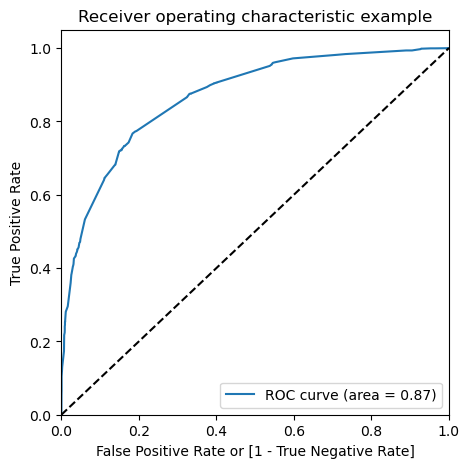

In [801]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

In [802]:
np.linspace(0,1,41)

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
       0.9  , 0.925, 0.95 , 0.975, 1.   ])

In [803]:
numbers = [round(x,3) for x in np.linspace(0,1,41)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,StudID,Predicted,0.0,0.025,0.05,0.075,0.1,0.125,...,0.775,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.975,1.0
0,0,0.084880,3009,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.367468,1012,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0.181677,9226,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0.574836,4750,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0.764406,7987,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [804]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [round(x,3) for x in np.linspace(0,1,41)]


# num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

        prob  accuracy     sensi     speci
0.000  0.000  0.385136  1.000000  0.000000
0.025  0.025  0.409699  0.999182  0.040461
0.050  0.050  0.441190  0.993459  0.095262
0.075  0.075  0.542592  0.983647  0.266325
0.100  0.100  0.556763  0.981194  0.290909
0.125  0.125  0.622264  0.971791  0.403329
0.150  0.150  0.644151  0.962388  0.444814
0.175  0.175  0.650291  0.952167  0.461204
0.200  0.200  0.720674  0.903516  0.606146
0.225  0.225  0.746812  0.875715  0.666069
0.250  0.250  0.748858  0.875307  0.669654
0.275  0.275  0.749173  0.866721  0.675544
0.300  0.300  0.793891  0.773508  0.806658
0.325  0.325  0.797355  0.766966  0.816389
0.350  0.350  0.796725  0.733034  0.836620
0.375  0.375  0.798142  0.724039  0.844558
0.400  0.400  0.798142  0.724039  0.844558
0.425  0.425  0.797827  0.721177  0.845839
0.450  0.450  0.799244  0.719542  0.849168
0.475  0.475  0.792631  0.685200  0.859923
0.500  0.500  0.792474  0.683565  0.860691
0.525  0.525  0.794993  0.646361  0.888092
0.550  0.55

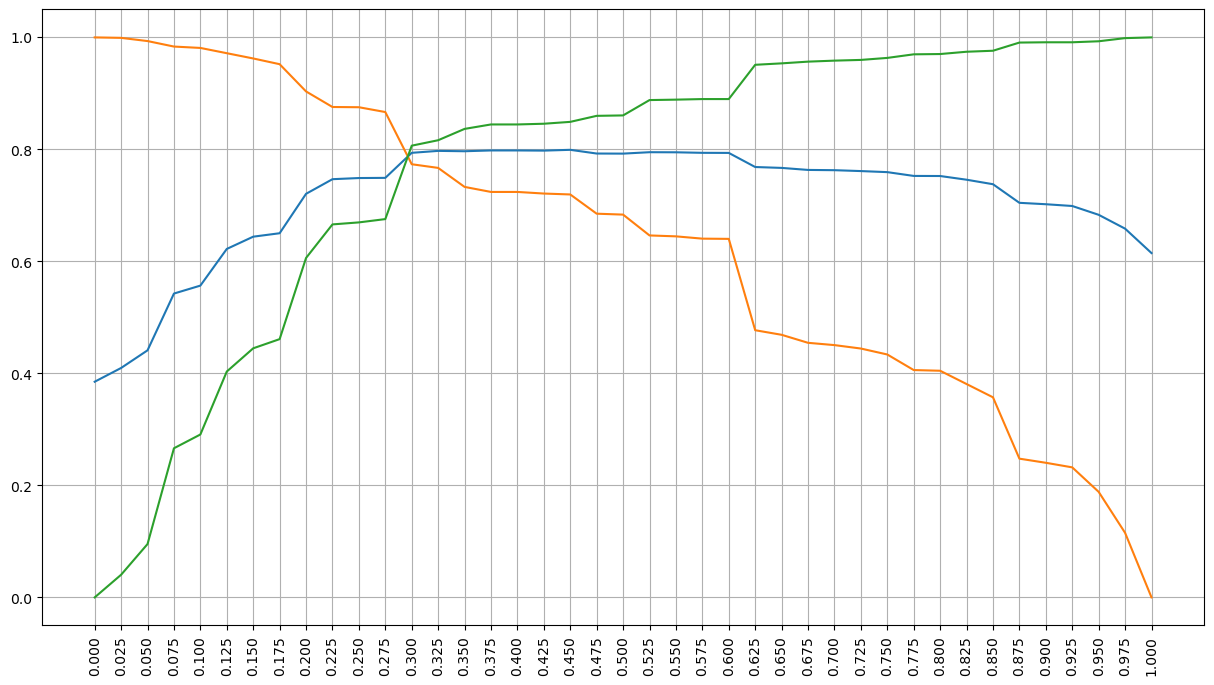

In [805]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

plt.figure(figsize=(15,8))
plt.plot(cutoff_df.prob, cutoff_df.accuracy)
plt.plot(cutoff_df.prob, cutoff_df.sensi)
plt.plot(cutoff_df.prob, cutoff_df.speci)
plt.xticks(num, rotation = 'vertical')
plt.grid(True)
plt.show()

**From the curve above, 0.30 is the optimum point to take it as a cutoff probability.**

**Even though we only need the lead score, which is our case is the probability but a
t cutoff probability 0.3 we have the best prediction, whether a lead would convert or not**

### Predicition on Training data with Cutoff Probability 0.36

In [806]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.084880
1012    0.367468
9226    0.181677
4750    0.574836
7987    0.764406
1281    0.611738
2880    0.119016
4971    0.743671
7536    0.857932
1248    0.368177
dtype: float64

In [807]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08488048, 0.36746848, 0.18167728, 0.57483566, 0.76440571,
       0.61173793, 0.11901589, 0.74367127, 0.85793247, 0.36817672])

In [808]:
y_train.index

Index([3009, 1012, 9226, 4750, 7987, 1281, 2880, 4971, 7536, 1248,
       ...
       4475,  839, 5760, 8056, 4245,  367,   82, 8199, 7077, 5754],
      dtype='int64', length=6351)

In [809]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['StudID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,StudID
0,0,0.084880,3009
1,0,0.367468,1012
2,0,0.181677,9226
3,1,0.574836,4750
4,1,0.764406,7987


In [810]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.365 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,StudID,Predicted
0,0,0.084880,3009,0
1,0,0.367468,1012,1
2,0,0.181677,9226,0
3,1,0.574836,4750,1
4,1,0.764406,7987,1


In [811]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3271  634]
 [ 654 1792]]


In [812]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7971972917650764


### Lets look for some other metrics for verification

In [813]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [814]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7326246933769419

In [815]:
# Let us calculate specificity
TN / float(TN+FP)

0.8376440460947503

In [816]:
# Calculate false postive rate - predicting converted when customer is not converted
print(FP/ float(TN+FP))

0.16235595390524968


In [817]:
# positive predictive value // Precision
print (TP / float(TP+FP))

0.7386644682605111


In [818]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8333757961783439


### Plotting the ROC Curve

In [819]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [820]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

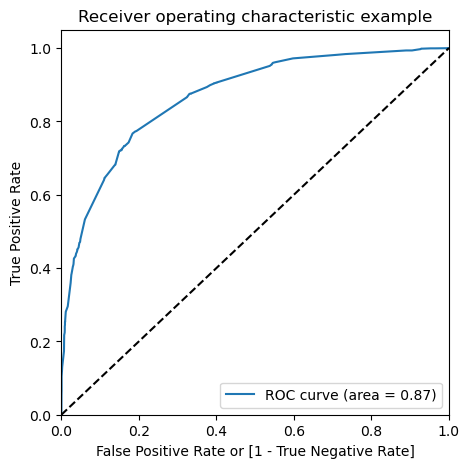

In [821]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Making predictions on the test set

In [822]:
X_test[['Total Time Spent on Website']] = scaler.transform(X_test[['Total Time Spent on Website']])

In [823]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_SMS Sent,TotalVisits_2.0,Page Views Per Visit_7.0
3271,-0.600595,False,False,False,False,False,False,False,False,False,False,False,False,False
1490,1.887326,False,False,False,False,False,False,True,False,False,False,False,False,False
7936,-0.752879,False,False,False,False,False,False,False,False,False,False,False,True,False
4216,-0.888650,True,False,False,False,True,False,False,True,False,False,False,False,False
3830,-0.587751,False,False,False,False,False,False,False,False,False,False,False,False,False


In [824]:
X_test_sm = sm.add_constant(X_test)

In [826]:
#Making predictions on the test set
X_test_sm = X_test_sm.astype(int)
y_test_pred = res.predict(X_test_sm)

In [827]:
y_test_pred[:10]

3271    0.119016
1490    0.950103
7936    0.084880
4216    0.784833
3830    0.119016
1800    0.832799
6507    0.611738
4821    0.221005
4223    0.959691
4714    0.067672
dtype: float64

In [828]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [829]:
# Let's see the head
y_pred_1.head()

,0
3271,0.119016
1490,0.950103
7936,0.084880
4216,0.784833
3830,0.119016


In [830]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [831]:
# Putting CustID to index
y_test_df['StudID'] = y_test_df.index

In [832]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [833]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [834]:
y_pred_final.head()

,Converted,StudID,0
0,0,3271,0.119016
1,1,1490,0.950103
2,0,7936,0.084880
3,1,4216,0.784833
4,0,3830,0.119016


In [835]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [838]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['StudID', 'Converted', 'Converted_Prob'])

In [839]:
# Let's see the head of y_pred_final
y_pred_final.head()

,StudID,Converted,Converted_Prob
0,3271,0,0.119016
1,1490,1,0.950103
2,7936,0,0.084880
3,4216,1,0.784833
4,3830,0,0.119016


In [842]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.300 else 0)

In [841]:
y_pred_final.head()

,StudID,Converted,Converted_Prob,final_predicted
0,3271,0,0.119016,0
1,1490,1,0.950103,1
2,7936,0,0.084880,0
3,4216,1,0.784833,1
4,3830,0,0.119016,0


In [843]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.791039294895336

In [844]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1410,  324],
       [ 245,  744]], dtype=int64)

In [845]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [846]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7522750252780587

In [847]:
# Let us calculate specificity
TN / float(TN+FP)

0.8131487889273357

In [848]:
print(FP/ float(TN+FP))

0.18685121107266436


In [849]:
# positive predictive value // Precision
print (TP / float(TP+FP))

0.6966292134831461


**Although we need the lead score, which is the probability of the logisitic regression , but using test data with cutoff probability of 0.3 we were able to achieve Sensitivity of around 75 %, which was the main requirement of our case study.**

**So using this trained logistic model and 13 columns we can get the lead score between 0 and 100 which would let us know how important a Lead is
Higher the Lead score, higher the chances of getting converted**


# End Of Notebook